# Importing functions from other notebooks

In [3]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [4]:
import import_ipynb

In [5]:
#note: Restart Kernel, evertime a change is made on either notebook being imported
# running all notebooks locally

# coxeter group imports
from CheckCoxeter_GenRandomConjugates_GinaRob import subroutine_b_cox, is_coxeter_matrix
from GenArtinCoxRelators_NonvisiblyReduced_CelinaRoman import reduce_coxeter_word, reduce_artin_word, cox_gen, cox_rel

# artin group imports
from CheckCoxeter_GenRandomConjugates_GinaRob import subroutine_b_artin #no is_artin_matrix yet
from GenArtinCoxRelators_NonvisiblyReduced_CelinaRoman import reduce_artin_word, artin_gen, artin_rel


Before reducing:  s₀s₂s₂s₄
After being reduced:  s₀s₄
Before reducing:  s₀s₂⁻¹s₂s₄
After reducing:  s₀s₄


In [6]:
#Run this preamble to import some libraries that are available in google colab that are often useful.
#Numpy is good for efficiently working with array/vector/matrix data.
#Random is good for generating random numbers according to some (discrete or continuous) distribution
#Matplotlib is good for plotting
#Torch is PyTorch, which is the standard python library for creating and training ML models
#You may need to call other libraries for your code

import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Additional
from typing import List, Tuple

# Generating a trivial word using subroutines (Coxeter and Artin)

In [ ]:
# Function generating the trivial words
def wordElongater(generators, relators, N: int, mode="coxeter") -> List[int]:
  """
  goal: generate a trivial word of length N by making it longer using subroutineB then removing 'aa' relations to make it less visibly reducible
  """
  word_creation_routine = None    #subroutine_b
  reduce_visible_routine = None   #subroutine_a

  if mode == "coxeter":
    word_creation_routine = subroutine_b_cox
    reduce_visible_routine = reduce_coxeter_word
  elif mode == "artin":
    word_creation_routine = subroutine_b_artin
    reduce_visible_routine = reduce_artin_word


  #initialize the empty word
  tWord = []

  # Check edge case where subroutine B wouldn't work (only 1 valid relator that only ever uses 2 generators)
  # get at least 2 relators with at least 2 generators 
  uniqueRels = []
  if mode == "coxeter":
    for rel in relators: 
      if len(rel) <= 2:  # skip relators that are too short
        continue
      uniqueGens = set()
      for gen in rel: 
        uniqueGens.add(gen)
      if len(uniqueGens) >= 2:
        uniqueRels.append(rel)
    # check if number of unique relators is less than 2
    if len(uniqueRels) == 1:
      rel = uniqueRels[0]
      if random.random() < 0.5:
        rel = rel[::-1]  # reverse the relator with 50% probability
      return uniqueRels[0] * (N // len(uniqueRels[0])) 
    elif len(uniqueRels) == 0:
      raise ValueError("Not enough valid relators with at least 2 generators to elongate the word.")
  elif mode == "artin":
    if len(generators) == 1:
      raise ValueError("Not enough generators to elongate the word.")


  ## Subroutine B: Elongating the word
  #run until desired size is reached (tWord will be of length: >= N)
  tWord = word_creation_routine(tWord, generators, relators)  #1st pass
  while( len(tWord) < N ):
    tWord = word_creation_routine(tWord, generators, relators)


  ## Subroutine A: removing the 'aa' visible trivial parts of a word
  #tWord=subroutineA(tWord)
  tWord = reduce_visible_routine(tWord)


  #check that it's long enough, if it is then return tWord, if not then call again
  if len(tWord) < N:
    tWord = wordElongater(generators, relators, N, mode=mode)

  return tWord


In [8]:
import math
IY = math.inf
coxeterMatrix = np.array([
    [IY, 3, 2, 2],
    [3, 1, 3, 2],
    [2, 3, 1, 3],
    [2, 2, 3, 1]
])

In [9]:
# Validating functions used to get generators and relators from a coxeter matrix:

coxeterMatrix = np.array([
    [1, 3, 2, 2],
    [3, 1, 3, 2],
    [2, 3, 1, 3],
    [2, 2, 3, 1]
])

#first check if the matrix is valid:
is_coxeter_matrix(4, coxeterMatrix)

## Get Generators and Relators
cGenerators = cox_gen(coxeterMatrix)
cRelators = cox_rel(coxeterMatrix)


print(cGenerators)
print(cRelators)

This is a valid Coxeter matrix.
[1, 2, 3, 4]
[[1, 1], [2, 2], [3, 3], [4, 4], (1, 2, 1, 2, 1, 2), (1, 3, 1, 3), (1, 4, 1, 4), (2, 3, 2, 3, 2, 3), (2, 4, 2, 4), (3, 4, 3, 4, 3, 4)]


In [10]:
# Validating subroutine functions and the trivial word generator function:

N = 10
trivialWord = wordElongater(cGenerators, cRelators, N)
print(f"Our word must be greater than or equal to {N}")
print(f"Trivial Word: {trivialWord}")
print(f"Length of Word: {len(trivialWord)}")

Our word must be greater than or equal to 10
Trivial Word: [1, 3, 2, 1, 4, 3, 4, 3, 4, 3, 1, 2, 3, 1]
Length of Word: 14


## Debug tests

In [11]:
N = 10
trivialWord = wordElongater(cGenerators, cRelators, N)
print(f"Our word must be greater than or equal to {N}")
print(f"Trivial Word: {trivialWord}")
print(f"Length of Word: {len(trivialWord)}")

Our word must be greater than or equal to 10
Trivial Word: [3, 2, 4, 3, 1, 3, 4, 3, 4, 3, 4, 1, 3, 4, 2, 3]
Length of Word: 16


In [12]:
la = [1,1,1,2,2,2]
t = ['h', 'i']
#insert elm into the list
la[3:3] = t
print(la)

[1, 1, 1, 'h', 'i', 2, 2, 2]


In [13]:
a1 = [1,2,3]
a2 = [6,5,4]
a3 = a1 + a2
print(a3)

[1, 2, 3, 6, 5, 4]


# Generating Trivial Word Dataset

In [ ]:
def writeRawTrivialDataset(generators, relators, totalWords, targetSize, mode="coxeter"):
  f = open("trivialWords.txt", mode="w")
  words = []
  for i in range(totalWords):
    word_as_list = wordElongater(generators, relators, targetSize, mode=mode)
    f.write(" ".join(str(item) for item in word_as_list) + "\n")
    words.append(word_as_list)
  return words

In [ ]:
# write to a file, trivialWords.txt

totalWords = 100
coxeterMatrix = np.array([
    [1, 3, 2, 2],
    [3, 1, 3, 2],
    [2, 3, 1, 3],
    [2, 2, 3, 1]
])
#first check if the matrix is valid:
is_coxeter_matrix(4, coxeterMatrix)

## Get Generators and Relators
cGenerators = cox_gen(coxeterMatrix)
cRelators = cox_rel(coxeterMatrix)

targetSize = 16

dataset = writeRawTrivialDataset(cGenerators, cRelators, totalWords, targetSize, mode="coxeter")



This is a valid Coxeter matrix.


In [ ]:
aGenerators = artin_gen(coxeterMatrix)
aRelators = artin_rel(coxeterMatrix)
print(aGenerators)
print(aRelators)
totalWords = 100
targetSize = 20
dataset = writeRawTrivialDataset(aGenerators, aRelators, totalWords, targetSize, mode="artin")

[-4, -3, -2, -1, 1, 2, 3, 4]
[[1, 2, 1, -2, -1, -2], [1, 3, -3, -1], [1, 4, -4, -1], [2, 3, 2, -3, -2, -3], [2, 4, -4, -2], [3, 4, 3, -4, -3, -4]]


# Get a distribution of trivial dataset

In [29]:
# Read in dataset from file

def readDataset(fileName:str):
  words = []
  with open(fileName) as fileObj:
    for line in fileObj:
      raw_list = line.split(" ")   #note: last gen has \n char as well
      gen_list = list(map(int, raw_list))
      lenWord = len(gen_list)
      words.append(gen_list)
  return words

# Use dataset to get a list of tuples with word length types and their frequencies

def getWordLengthFrequencies(dataset) -> List[Tuple[int,int]]:
  frequencies = {}
  for word in dataset:
    wordLen = len(word)
    if wordLen in frequencies:
      frequencies[wordLen] += 1
    else:
      frequencies[wordLen] = 1
  return frequencies

# Create a plot for the frequencies dictionary

def plotFrequencies(dataset):
  #turn dataset into list of lengths
  wordLengths = [len(word) for word in dataset]

  plt.hist(wordLengths)


[-4, -3, -2, -1, 1, 2, 3, 4]
[[1, 2, 1, -2, -1, -2], [1, 3, -3, -1], [1, 4, -4, -1], [2, 3, 2, -3, -2, -3], [2, 4, -4, -2], [3, 4, 3, -4, -3, -4]]


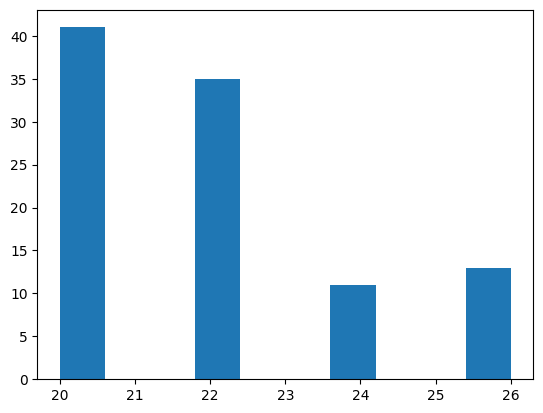

In [ ]:
# Using the above functions:
aGenerators = artin_gen(coxeterMatrix)
aRelators = artin_rel(coxeterMatrix)
print(aGenerators)
print(aRelators)
totalWords = 100
targetSize = 20
words = writeRawTrivialDataset(aGenerators, aRelators, totalWords, targetSize, mode="artin")
#words = readDataset("trivialWords.txt")

plotFrequencies(words)

## Debugs testing dataset and freq functions

In [ ]:
# Debugging code:

trivialDataset = readDataset(fileName="trivialWords.txt")
print(f"First Word: {dataset[0]}")

frequencies = getWordLengthFrequencies(dataset)
print(f"Word Lengths: {frequencies.keys()}")  

total = 0
for freq in frequencies.values():
  total += freq
print(f"Total Words: {total}")

First Word: [3, 1, -3, 2, 1, 3, 4, 1, 3, 3, 2, 3, -2, -3, -2, -3, -1, -4, -3, -1, -2, 3, -1, -3]
Word Lengths: dict_keys([24, 20, 22, 26])
Total Words: 100


# Match Trivial Dataset with a "likely" Non-Trivial dataset

In [ ]:
# take a trivial dataset and set of generators to return a similarly sized non trivial dataset

def writeRawNontrivialDataset(trivialDataset, generators, fileName="nontrivialWords.txt"):

  nontrivialDataset = []

  # create matchine likely non trivial word based on length of each trivial word it reads in a loop 
  for trivialWord in trivialDataset: 
    
    nontrivialWord = []
    for i in range(len(trivialWord)):
      randomGen = generators[random.randint(0, len(generators)-1)]
      nontrivialWord.append(randomGen)
    nontrivialDataset.append(nontrivialWord)

  # add the words to the nonTrivialWords.txt file (todo: in a random order)
  f = open("nontrivialWords.txt", mode="w")
  words = []
  for word_as_list in nontrivialDataset:
    f.write(" ".join(str(item) for item in word_as_list) + "\n")
    words.append(word_as_list)
  return words

In [ ]:
nontrivialDataset = writeRawNontrivialDataset(trivialDataset, aGenerators)

In [22]:
#in the dataet file, at end the line use ,1 if nontrivial and ,0 if trivial
#include date for when the file was generated 
#create folders for type of dataset being made?  


# Combine both datasets into one label per line

In [23]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split

def createTrainTestSplitData(trivialFileName, nontrivialFileName, test_size=0.3):
    """
    returns (trainDF, testDF) 
    """
    # Step 1: Read the raw data 
    def loadRaw(filename, label):
        with open(filename, 'r') as file:
            lines = file.readlines()
        # Each line is a list of tokens separated by spaces
        return pd.DataFrame({
            'tokens': [line.strip().split() for line in lines],
            'label': label
        })

    # Load data from both classes
    raw_tDF = loadRaw(trivialFileName, '0') #raw trivial dataframe
    raw_ntDF = loadRaw(nontrivialFileName, '1') #raw non-trivial dataframe

    # combines both raw datasets into a single pandas dataframe
    raw_df = pd.concat([raw_tDF, raw_ntDF]).sample(frac=1, random_state=42).reset_index(drop=True)

    # creating 2 separate training and testing dataframes (modify test_size param)
    train_df, test_df = train_test_split(raw_df, test_size=test_size, random_state=42, stratify=raw_df['label'])

    # Optional: print or save
    print("Training set size:", len(train_df))
    print("Testing set size:", len(test_df))

    # Save to CSV or use directly
    train_df.to_csv('train.csv', index=False)
    test_df.to_csv('test.csv', index=False)
    
    return (train_df, test_df)


In [24]:
trainDF, testDF = createTrainTestSplitData("trivialWords.txt", "nontrivialWords.txt", test_size=0.3)

Training set size: 140
Testing set size: 60


# Single Function to load existing dataset

In [25]:
# return dataframe representing the dataset
def loadDataset(datasetName:str):
    df = pd.read_csv(datasetName)  # ex: 'train.csv' or 'test.csv'

    # Convert the 'tokens' column back to lists
    df['tokens'] = df['tokens'].apply(ast.literal_eval)

    return df

In [32]:
trainDF = loadDataset("train.csv")
testDF = loadDataset('test.csv')
print(trainDF.head())
print()
print(f"Word as a list of tokens: {trainDF['tokens'][0]}") # prints the token list of the first example
print(f"Label for Entry 1: {trainDF['label'][0]}")  # print label

                                              tokens  label
0  [4, 2, 3, 1, 2, 3, 2, 3, 2, 3, 1, 4, 3, 2, 3, ...      0
1  [2, 2, 1, 1, 3, 1, 1, 1, 1, 3, 4, 2, 2, 1, 1, ...      1
2  [4, 2, 3, 3, 3, 1, 1, 4, 2, 3, 2, 3, 3, 2, 1, ...      1
3  [2, 1, 2, 3, 2, 1, 3, 1, 3, 4, 4, 2, 3, 1, 3, ...      1
4  [4, 4, 1, 2, 4, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, ...      1

Word as a list of tokens: ['4', '2', '3', '1', '2', '3', '2', '3', '2', '3', '1', '4', '3', '2', '3', '2', '3', '2', '4', '3', '1', '2', '1', '2', '1', '4']
Label for Entry 1: 0


# Single function to make csv datasets and dataframes for testing

In [ ]:
def makeMeMyData(coxeterMatrix, datasetSize, wordLength, test_size="0.3", mode="coxeter"):
    """ 
    returns (trainDF, testDF)
    """
    generators = None  
    relators = None
    datasetSize = datasetSize // 2 
    if mode == "coxeter":
        is_coxeter_matrix(len(coxeterMatrix), coxeterMatrix)
        generators = cox_gen(coxeterMatrix)
        relators = cox_rel(coxeterMatrix)
    elif mode == "artin":
        print("check again")
        generators = artin_gen(coxeterMatrix)
        relators = artin_rel(coxeterMatrix)
    
    # create nontrivialwords.txt and trivialwords.txt 
    trivialDataset = writeRawTrivialDataset(generators, relators, datasetSize, wordLength, mode=mode)
    nontrivialDataset = writeRawNontrivialDataset(trivialDataset, generators)
    
    trainDF, testDF = createTrainTestSplitData("trivialWords.txt", "nontrivialWords.txt")
    
    return trainDF, testDF

In [28]:
coxeterMatrix = np.array([
    [1, 3, 2, 2],
    [3, 1, 3, 2],
    [2, 3, 1, 3],
    [2, 2, 3, 1]
])

trainDF, testDF = makeMeMyData(coxeterMatrix, 2000, 20, test_size=0.3, mode="coxeter")


This is a valid Coxeter matrix.
Training set size: 1400
Testing set size: 600


In [ ]:
# import file io libraries
import os 
# save dataset to a file in the generatedData folder
def saveDatasetToFile(trainDF, testDF, folderName="generatedData"):
    if not os.path.exists(folderName):
        os.makedirs(folderName)
    
    trainFilePath = os.path.join(folderName, "train.csv")
    testFilePath = os.path.join(folderName, "test.csv")
    
    trainDF.to_csv(trainFilePath, index=False)
    testDF.to_csv(testFilePath, index=False)
    
    print(f"Train dataset saved to {trainFilePath}")
    print(f"Test dataset saved to {testFilePath}")